In [116]:
import librosa
import numpy as np
from matplotlib import pyplot as plt

In [117]:
def arr_pad(x, fs, length, mode="pre"):
    """adds zeros before or after a array until it got the desired length

    Args:
        x (_type_): 1-d numpy array
        fs (int): sampling rate of audio signal
        length (_type_): length after padding in seconds
        mode (str, optional): adding zeros before (pre) or after (post) the signal. Defaults to 'pre'.

    Returns:
        _type_: zero-padded 1-d numpy array
    """

    x_len = x.shape[0]  # length of input array
    y_len = fs * length  # length of array after padding
    # if padding is needed
    if y_len - x_len:
        # select mode
        if mode == "pre":
            pad_width = (y_len - x_len, 0)
        elif mode == "post":
            pad_width = (0, y_len - x_len)

        y = np.pad(x, pad_width)

    else:
        y = x
    return y

In [141]:
def arr_split(x, fs, length, overlap=0.5):
    """splits array into chunks of length fs * length

    Args:
        x (numpy.ndarray): 1d numpy array
        fs (int,float): sample rate of signal
        length (float): length of signal in seconds
        overlap (float, optional): overlap of chunks. 0 means no overlap. Defaults to 0.5.

    Returns:
        numpy.ndarray: 2d array with rows being the signal chunks
    """

    y_len = fs * length  # sample length of chunks
    split_start = np.arange(
        0, x.shape[0], int(y_len * (1 - overlap))
    )  # startings indices for chunks
    split_end = np.arange(
        int(y_len), x.shape[0], int(y_len * (1 - overlap))
    )  # stopping indices

    # if array not empty
    if split_end.size != 0:
        # check whether last stop index is smaller than last index of array
        if split_end[-1] < x.shape[0]:
            split_end = np.append(split_end, x.shape[0])
    else:
        split_end = np.append(split_end, x.shape[0])

    # match array sizes. one starting index pairs with one stopping index
    split_start = split_start[: split_end.shape[0]]

    # create output array
    y = np.zeros((split_end.shape[0], y_len))

    # fill output array with padded arrays
    for idx in range(y.shape[0]):
        y[idx, :] = arr_pad(x[split_start[idx] : split_end[idx]], fs, length)

    return y

In [151]:
x = np.linspace(0,1, int(17 * 4000))
fs = 4000
length = 8
y = arr_split(x, fs, length, overlap = 0.5)
type(y)

numpy.ndarray

In [148]:
print(y[-1,:])

[0.         0.         0.         ... 0.99997059 0.99998529 1.        ]


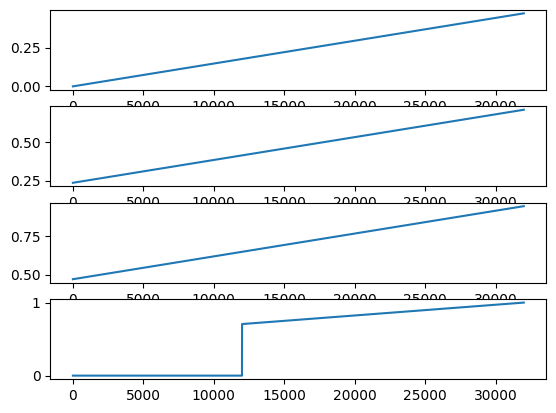

In [149]:
fig,ax = plt.subplots(y.shape[0])
for count, row in enumerate(y):
    ax[count].plot(row)